# Decision tree - Fraud Detection Analysis

## Import libraries

In [225]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

## Reading csv

The dataset contains transactions made by credit cards in September 2013 by European cardholders. <br />
Data Source on Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [226]:
df = pd.read_csv('assets/creditcard.csv')

In [227]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

Dataset description

Feature | Description 
------- | -----------
Amount | Transaction Value
V_i (1 - 28) | Unkown atributes 
Time | Time since the first group transaction

## EDA

In [228]:
df_eda = df[['Time','Class']].groupby('Class').count().reset_index().rename(columns={'Time':'Transactions by class'})
df_eda['Total transactions'] = df_eda['Transactions by class'].sum()
df_eda['Percentage by class'] = 100*df_eda['Transactions by class']/df_eda['Total transactions']
df_eda

Class  Transactions by class  Total transactions  Percentage by class
0      0                 284315              284807            99.827251
1      1                    492              284807             0.172749

There are ~284k transactions in the dataset. We can notice it's unbalanced, only 17% contains fraudulent transactions.

## Train test split

Due to the unbalanced variables, the method used to split the dataset was the StratifiedShuffleSplit, that preserve the sample percentage of each class.

In [229]:
def exe_validator(X,y):
    validator = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
    for train_id, test_id in validator.split(X,y):
        X_train, X_test = X[train_id],X[test_id]
        y_train, y_test = y[train_id],y[test_id]
    return X_train, X_test, y_train, y_test

## Decision tree classifier

Standard decision tree classifier, using all default values as parameters (Gini impurity criteria and max depth set as none).

In [230]:
def exe_classifier(classifier, X_train, X_test, y_train):
    tree = classifier.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    return y_pred

In [231]:
def tree_figure(classifier, size_h, size_w):
    plt.figure(figsize=(size_h,size_w))
    tree.plot_tree(classifier, filled=True, fontsize=16)
    plt.show()

## Execution

In [232]:
%%time
#Data inputs and validator
X = df.drop(columns='Class').values
y = df[['Class']].values
X_train, X_test, y_train, y_test = exe_validator(X,y)

#Classifier type and execution
classifier_decision_tree = tree.DecisionTreeClassifier()
y_pred = exe_classifier(classifier_decision_tree, X_train, X_test, y_train)

#tree figure execution
tree_figure(classifier_decision_tree, 200, 100)

Wall time: 31.1 s


## Validation

We're using the following tests to validate the model: <br />
**Acuracy**: correctly predicted transactions/all transactions ; <br />
**Precision score**: correctly predicted fraudulent transactions/all fraudulent transactions ; <br />
**Recall**: correctly predicted fraudulent transactions/all fraudulent predictions. <br />

In [233]:
def exe_validation(y_test,y_pred):
    v_accuracy = accuracy_score(y_test, y_pred)
    v_precision_score = precision_score(y_test, y_pred)
    v_recall_score = recall_score(y_test, y_pred)

    print("Accuracy: %.4f" % v_accuracy)
    print("Precision score: %.4f" % v_precision_score)
    print("Recall score: %.4f" % v_recall_score)
    print("Confusion matrix")
    print(confusion_matrix(y_test, y_pred))

    return (v_accuracy, v_precision_score, v_recall_score)

In [234]:
exe_validation(y_test, y_pred)

Accuracy: 0.9991
Precision score: 0.7391
Recall score: 0.6939
Confusion matrix
[[28420    12]
 [   15    34]]


(0.9990519995786665, 0.7391304347826086, 0.6938775510204082)

In [235]:
#checking the test split method
print(len(y_train[y_train==1])/len(y_train[y_train==0]))
print(len(y_test[y_test==1])/len(y_test[y_test==0]))

0.0017312599899172668
0.0017234102419808666


## Tuning parameters

Verying which possible change can be made in the parameters that results in a relevant improvement of our model.

In [236]:
print(classifier_decision_tree.get_params())
print(classifier_decision_tree.get_depth())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
21


### Max depth

In [237]:
%%time
#Classifier type and execution
classifier_decision_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0)
y_pred = exe_classifier(classifier_decision_tree, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred)

Accuracy: 0.9995
Precision score: 0.9474
Recall score: 0.7347
Confusion matrix
[[28430     2]
 [   13    36]]
Wall time: 10.6 s


(0.9994733330992591, 0.9473684210526315, 0.7346938775510204)

### Max depth and Min sample leaf

In [238]:
%%time
#Classifier type and execution
classifier_decision_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=10)
y_pred = exe_classifier(classifier_decision_tree, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred)

Accuracy: 0.9994
Precision score: 0.8605
Recall score: 0.7551
Confusion matrix
[[28426     6]
 [   12    37]]
Wall time: 10.6 s


(0.9993679997191109, 0.8604651162790697, 0.7551020408163265)

It was possible to achieve better results using only the max_depth parameter.

### Looping the max depth

In [239]:
%%time
#Classifier type and execution
classifier_decision_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
y_pred = exe_classifier(classifier_decision_tree, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred)

Accuracy: 0.9994
Precision score: 0.9211
Recall score: 0.7143
Confusion matrix
[[28429     3]
 [   14    35]]
Wall time: 5.4 s


(0.999403110845827, 0.9210526315789473, 0.7142857142857143)

In [240]:
ac_list=[]
precision_list=[]
rec_list=[]
max_depth_range=range(1,20)

for i in max_depth_range:
    print(' ')
    print('Itaration number:', i)
    classifier_decision_tree = tree.DecisionTreeClassifier(max_depth=i, random_state=0)
    y_pred = exe_classifier(classifier_decision_tree, X_train, X_test, y_train)
    v_accuracy_score, v_precision_score, v_recall_score = exe_validation(y_test, y_pred)
    ac_list.append(v_accuracy_score)
    precision_list.append(v_precision_score)
    rec_list.append(v_recall_score)

 
Itaration number: 1
Accuracy: 0.9990
Precision score: 0.7273
Recall score: 0.6531
Confusion matrix
[[28420    12]
 [   17    32]]
 
Itaration number: 2
Accuracy: 0.9992
Precision score: 0.7955
Recall score: 0.7143
Confusion matrix
[[28423     9]
 [   14    35]]
 
Itaration number: 3
Accuracy: 0.9992
Precision score: 0.8140
Recall score: 0.7143
Confusion matrix
[[28424     8]
 [   14    35]]
 
Itaration number: 4
Accuracy: 0.9993
Precision score: 0.8537
Recall score: 0.7143
Confusion matrix
[[28426     6]
 [   14    35]]
 
Itaration number: 5
Accuracy: 0.9994
Precision score: 0.9211
Recall score: 0.7143
Confusion matrix
[[28429     3]
 [   14    35]]
 
Itaration number: 6
Accuracy: 0.9994
Precision score: 0.9000
Recall score: 0.7347
Confusion matrix
[[28428     4]
 [   13    36]]
 
Itaration number: 7
Accuracy: 0.9994
Precision score: 0.8974
Recall score: 0.7143
Confusion matrix
[[28428     4]
 [   14    35]]
 
Itaration number: 8
Accuracy: 0.9994
Precision score: 0.9231
Recall score:

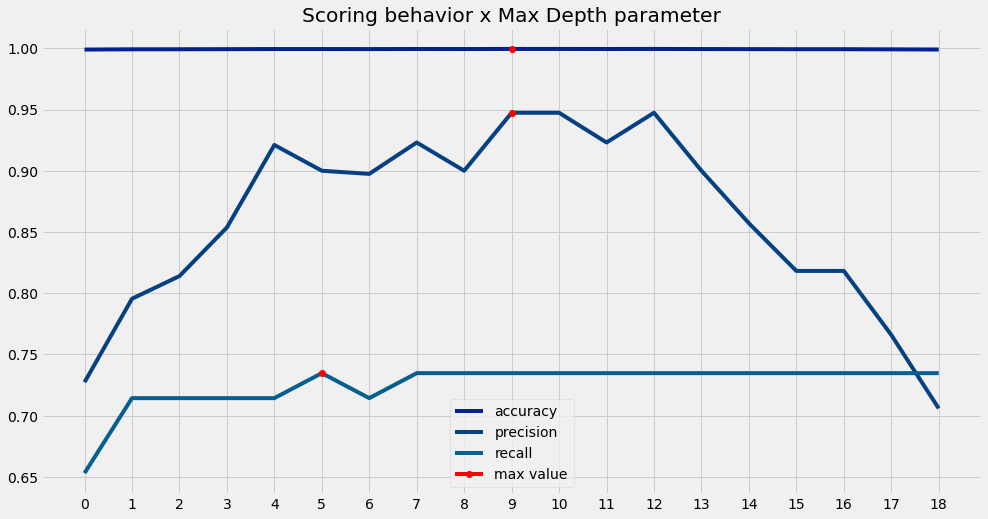

In [241]:
from cProfile import label


plt.figure(figsize=(15,8))

plt.plot(ac_list, color='#052090', label='accuracy')
plt.plot(precision_list, color='#054080', label='precision')
plt.plot(rec_list, color='#056090', label='recall')
plt.plot(np.argmax(ac_list), max(ac_list), color='red', label='max value', marker='o')
plt.plot(np.argmax(precision_list), max(precision_list),  color='red', marker='o')
plt.plot(np.argmax(rec_list), max(rec_list), color='red', marker='o')

plt.xticks(range(0,max(max_depth_range)))
plt.title('Scoring behavior x Max Depth parameter')
plt.legend()

## Esemble learning - Random forest

In [242]:
%%time
classifier_random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
y_pred_random_forest = exe_classifier(classifier_random_forest, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred_random_forest)

<ipython-input-230-eafa508e3699>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = classifier.fit(X_train,y_train)


Accuracy: 0.9995
Precision score: 0.9487
Recall score: 0.7551
Confusion matrix
[[28430     2]
 [   12    37]]
Wall time: 3min 12s


(0.9995084442259752, 0.9487179487179487, 0.7551020408163265)

Since we have mutiple trees, only one of them is plotted 

In [243]:
#tree figure execution
tree_figure(classifier_random_forest.estimators_[0],200,100)

In [244]:
%%time
classifier_random_forest = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=10)
y_pred_random_forest = exe_classifier(classifier_random_forest, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred_random_forest)

<ipython-input-230-eafa508e3699>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = classifier.fit(X_train,y_train)


Accuracy: 0.9995
Precision score: 0.9737
Recall score: 0.7551
Confusion matrix
[[28431     1]
 [   12    37]]
Wall time: 58.5 s


(0.9995435553526912, 0.9736842105263158, 0.7551020408163265)

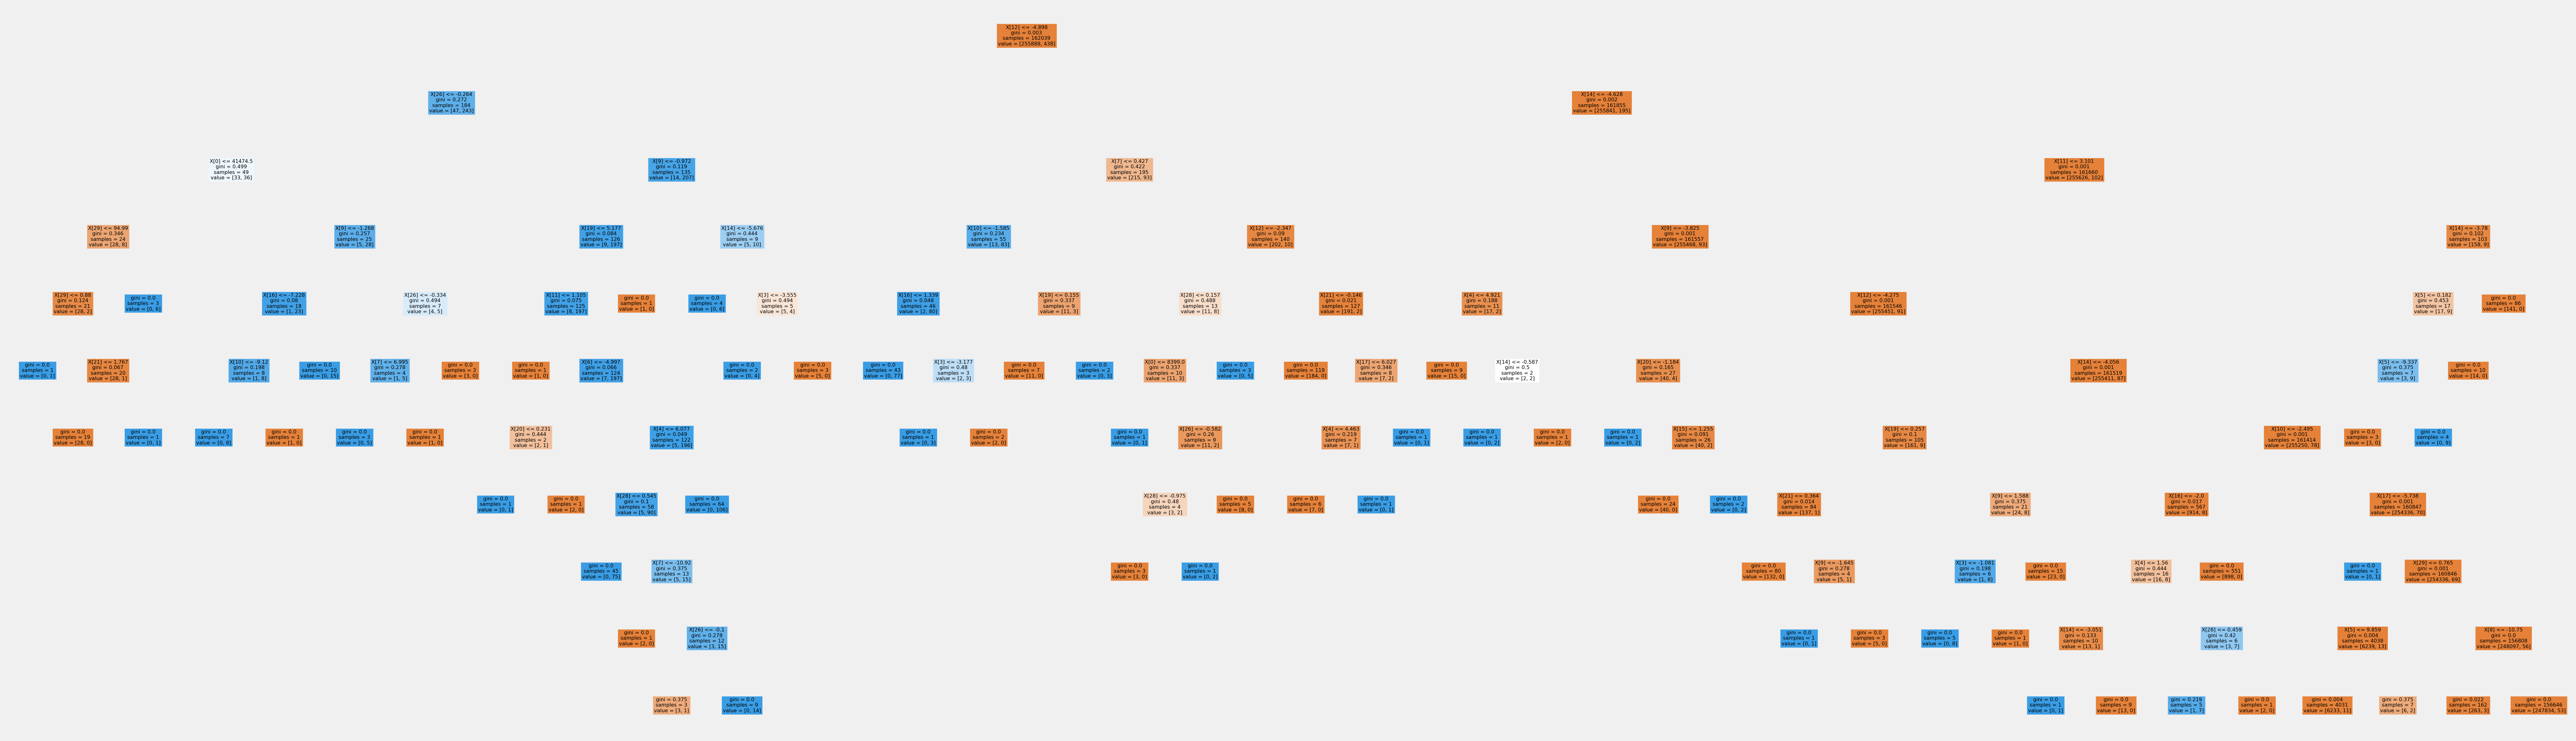

In [245]:
#tree figure execution
tree_figure(classifier_random_forest.estimators_[0],130,40)

Better results were achieved on precision (97%) using the random forest method and setting the max_depth parameter to 10 and smaller number of estimators (trees).

## Adaboost

In [246]:
%%time
classifier_adaboost = AdaBoostClassifier(random_state=0)
y_pred_adaboost = exe_classifier(classifier_adaboost, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred_adaboost)

c:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.9993
Precision score: 0.8889
Recall score: 0.6531
Confusion matrix
[[28428     4]
 [   17    32]]
Wall time: 57.7 s


(0.9992626663389628, 0.8888888888888888, 0.6530612244897959)

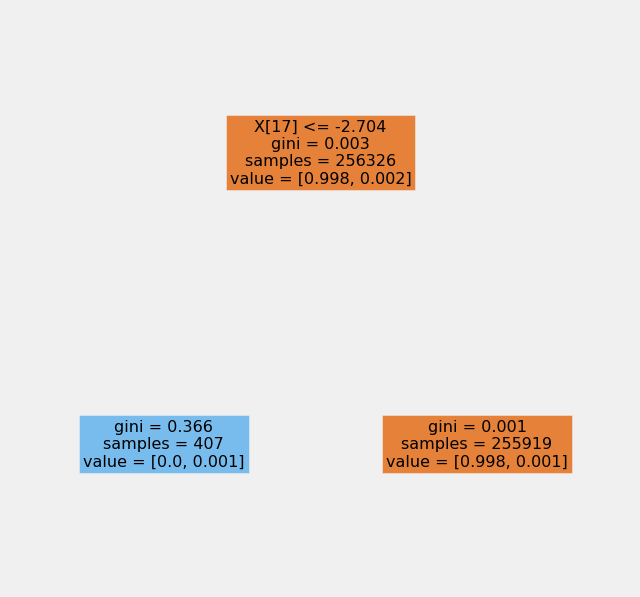

In [247]:
#tree figure execution
tree_figure(classifier_adaboost.estimators_[0],10,10)

In [248]:
%%time
classifier_adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_adaboost = exe_classifier(classifier_adaboost, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred_adaboost)

c:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.9994
Precision score: 0.8636
Recall score: 0.7755
Confusion matrix
[[28426     6]
 [   11    38]]
Wall time: 1min 55s


(0.999403110845827, 0.8636363636363636, 0.7755102040816326)

In [249]:
%%time
classifier_adaboost = AdaBoostClassifier(random_state=0, n_estimators=200)
y_pred_adaboost = exe_classifier(classifier_adaboost, X_train, X_test, y_train)

#parameters validation
exe_validation(y_test, y_pred_adaboost)

c:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.9995
Precision score: 0.9286
Recall score: 0.7959
Confusion matrix
[[28429     3]
 [   10    39]]
Wall time: 3min 51s


(0.9995435553526912, 0.9285714285714286, 0.7959183673469388)